### List of Imports 

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np 
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import scipy
import patsy
import sys
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest


%matplotlib inline 

/Users/liyuqiao/anaconda/envs/py3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Versions 

In [3]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


### Read Data 

In [3]:
with open('../../Data/movies_clean.pickle', 'rb') as f:
    movies_df = pickle.load(f)

In [4]:
movies_df_3D = movies_df[movies_df['Genre_3D']==1]

In [5]:
movies_df_3D.corr().head()

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
Runtime (mins),1.000000,0.495167,0.437825,-0.162867,-0.017789,-0.105054,0.208332,0.142170,-0.004120,-0.083798,...,0.284790,0.236927,NaN,0.181222,0.350551,0.229513,0.138438,0.177418,0.072334,0.107190
Opening Weekend Gross ($),0.495167,1.000000,0.914747,-0.149681,0.071308,-0.003261,0.283690,0.218650,0.003403,-0.120120,...,0.490756,0.557486,NaN,-0.006739,0.262593,0.096889,0.152779,0.389105,0.191163,0.225469
DomesticTotalGross,0.437825,0.914747,1.000000,-0.153575,0.048382,-0.004047,0.184069,0.200949,0.000556,-0.134578,...,0.488146,0.638826,NaN,-0.024724,0.208497,0.145349,0.071593,0.349777,0.111800,0.149287
Release Month_2,-0.162867,-0.149681,-0.153575,1.000000,-0.095791,-0.053347,-0.102321,-0.095791,-0.120754,-0.081818,...,-0.093018,-0.065912,NaN,-0.032052,-0.049230,0.012720,-0.026332,-0.041902,-0.018580,-0.018580
Release Month_3,-0.017789,0.071308,0.048382,-0.095791,1.000000,-0.062457,-0.119795,-0.112150,-0.141376,-0.095791,...,0.060344,-0.013397,NaN,0.053343,0.016915,-0.007260,0.122031,-0.049058,-0.021753,-0.021753


In [7]:
movies_df_3D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 47
Data columns (total 34 columns):
Movie Title                  238 non-null object
Runtime (mins)               238 non-null float64
Opening Weekend Gross ($)    238 non-null float64
DomesticTotalGross           238 non-null float64
Release Month_2              238 non-null uint8
Release Month_3              238 non-null uint8
Release Month_4              238 non-null uint8
Release Month_5              238 non-null uint8
Release Month_6              238 non-null uint8
Release Month_7              238 non-null uint8
Release Month_8              238 non-null uint8
Release Month_9              238 non-null uint8
Release Month_10             238 non-null uint8
Release Month_11             238 non-null uint8
Release Month_12             238 non-null uint8
MPAA_PG/PG-13                238 non-null uint8
MPAA_R                       238 non-null uint8
MPAA_Unrated                 238 non-null uint8
Genre_3D                 

In [8]:
movies_df_3D.describe().head(2)

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
count,238.000000,238.000000,238.000000,238.00000,238.00000,238.000000,238.000000,238.00000,238.000000,238.00000,...,238.000000,238.00000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,107.172269,46.142832,148.402228,0.07563,0.10084,0.033613,0.113445,0.10084,0.151261,0.07563,...,0.180672,0.05042,0.0,0.151261,0.109244,0.046218,0.008403,0.021008,0.004202,0.004202


In [9]:
movies_df_3D.shape

(238, 34)

### Dataset Standardization - removes the mean and scaling to unit variance 
L1 and L2 regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [10]:
not_y = movies_df_3D.loc[:, movies_df_3D.columns != 'DomesticTotalGross'] 
x = not_y.loc[:, not_y.columns != 'Movie Title']
x = x[[x for x in x.columns if x != 'Genre_3D']]
y = movies_df_3D.DomesticTotalGross

In [11]:
print('Model Features: ', x.columns)

Model Features:  Index(['Runtime (mins)', 'Opening Weekend Gross ($)', 'Release Month_2',
       'Release Month_3', 'Release Month_4', 'Release Month_5',
       'Release Month_6', 'Release Month_7', 'Release Month_8',
       'Release Month_9', 'Release Month_10', 'Release Month_11',
       'Release Month_12', 'MPAA_PG/PG-13', 'MPAA_R', 'MPAA_Unrated',
       'Prod_Budget_Medium', 'Prod_Budget_Small', 'Release_Limited',
       'Release_Wild', 'Director_Above_10', 'Director_Above_20',
       'Director_Above_40', 'Director_Below_1', 'Actors Rank_2',
       'Actors Rank_3', 'Actors Rank_4', 'Actors Rank_5', 'Actors Rank_6',
       'Actors Rank_7', 'Actors Rank_8'],
      dtype='object')


In [12]:
print('Dimensionality of features:', x.shape)
print('Dimensionality of target:', (len(y),))

Dimensionality of features: (238, 31)
Dimensionality of target: (238,)


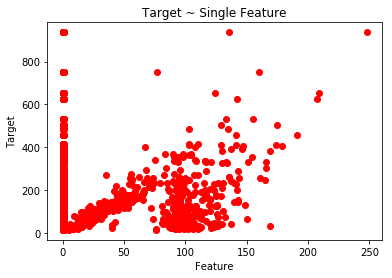

In [13]:
plt.plot(x, y, 'ro');
plt.title('Target ~ Single Feature')
plt.xlabel('Feature')
plt.ylabel('Target');

In [14]:
ssX = StandardScaler()
not_Y = movies_df_3D[[x for x in movies_df.columns if x != 'DomesticTotalGross']] 
X = not_Y[[x for x in not_y.columns if x != 'Movie Title']]
X = X[[x for x in X.columns if x != 'Genre_3D']]
Y = movies_df_3D.DomesticTotalGross

### Train-Test Split - 10% of Data as Holdout for Validation

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [16]:
X_tr = ssX.fit_transform(X_train)
X_val = ssX.transform(X_val)

In [17]:
print('Dimensionality of training features:', X_train.shape)
print('Dimensionality of training target:', Y_train.shape)

Dimensionality of training features: (214, 31)
Dimensionality of training target: (214,)


##### Regression Statistics
R2: square of the correlation coefficient and represents the estimated percentage of the variance in our target variable Y that can be explained by our regression model. Adjusted R2 also penalizes for things such as large coefficients and extra variables to try and limit overfitting so it is often a better measure of model efficacy.

P(|t|) measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.
Putting it all together, the final column returns a 95% Confidence Interval for the value of each coefficient.

In [18]:
# fit1_1.resid.plot(style='ro', figsize=(12,8))

### Linear Regression Model 1: SkLearn 

In [19]:
df_train = pd.DataFrame(X_tr)
df_train.columns = [x.columns]

In [20]:
def sklearn_lr(feature,cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    lr = LinearRegression()
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    lr.fit(x_train, Y_train)
    score_ = cross_val_score(lr, x_train, Y_train, cv = cv, scoring = scoring)
    score_mean = score_.mean()
    intercept_ = lr.intercept_
    coef_ = lr.coef_
    print('|Mean score (Neg MAE)|: ', score_mean
          , '\n', 'Intercept|: ',intercept_, '\n', '|Coefs|: ', coef_)

In [21]:
sk_m1 = sklearn_lr(['Opening Weekend Gross ($)'])

|Mean score (Neg MAE)|:  -32.0993820466 
 Intercept|:  148.067155829 
 |Coefs|:  [ 122.59357229]


In [22]:
sk_m2 = sklearn_lr(['Opening Weekend Gross ($)','Release Month_5'
                    ,'Release Month_6','MPAA_R','Release_Wild', 'Director_Above_10'
                    ,'Director_Above_20', 'Director_Above_40','Actors Rank_3'
                    , 'Actors Rank_5','Actors Rank_7', 'Actors Rank_8'])

|Mean score (Neg MAE)|:  -26.8759498538 
 Intercept|:  148.067155829 
 |Coefs|:  [ 83.44937182 -11.25445861  -8.42117062  -3.12761077  -3.14693637
  21.8236219   38.82169169  52.16656263  -5.18481681  -7.19183178
  -5.48147627 -10.71834235]


### Linear Regression Model 2 - Lasso Regression (L1)

In [23]:
# def adj_r2(rsquare, num_data, num_features):
#     temp = (1-rsquare)*(num_data-1)
#     temp = temp/(num_data-num_features-1)
#     temp = 1 - temp
#     return temp

In [24]:
def lasso_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Lasso(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_lasso = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_lasso.intercept_
    best_coefs = best_lasso.coef_
    print('|Best Lasso|: ',best_lasso
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [25]:
# 5-fold CV, scoring with negative MAE, 1 feature: 
best_lasso_I1 = lasso_modeling(['Opening Weekend Gross ($)'])

|Best Lasso|:  Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -32.0714530942 
 |Intercept|:  148.067155829 
 |Coefficients|:  [ 122.59356229]


##### _Out of all models w/ Lasso(w/ different combination of features) tested, the one below returns the hightst R^2._

In [26]:
best_lasso_I2 = lasso_modeling(['Opening Weekend Gross ($)','Release Month_5'
                    ,'Release Month_6','MPAA_R','Director_Above_10'
                    ,'Director_Above_20', 'Director_Above_40'
                    , 'Actors Rank_5','Actors Rank_8'])

|Best Lasso|:  Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -26.3605837355 
 |Intercept|:  148.067155829 
 |Coefficients|:  [ 79.97774323  -9.15183146  -5.37820525  -3.12316323  20.35476385
  37.27874159  51.99186284  -4.94731079  -9.03858254]


### Linear Regression Model 3 - Ridge Regression (L2)

In [27]:
def ridge_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Ridge(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_ridge = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_ridge.intercept_
    best_coefs = best_ridge.coef_
    print('|Best Ridge|: ',best_ridge
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [28]:
best_ridge_I1 = ridge_modeling(['Opening Weekend Gross ($)'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -32.0714526655 
 |Intercept|:  148.067155829 
 |Coefficients|:  [ 122.59356657]


##### _Out of all models w/ L2 (w/ different combination of features) tested, the one below returns the highest R^2._ 

In [29]:
best_ridge_I2 = ridge_modeling(['Opening Weekend Gross ($)','Release Month_5'
                    ,'Release Month_6','MPAA_R','Release_Wild', 'Director_Above_10'
                    ,'Director_Above_20', 'Director_Above_40'
                    ,'Actors Rank_8'])

|Best Ridge|:  Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -26.191495767 
 |Intercept|:  148.067155829 
 |Coefficients|:  [ 75.96516462 -10.09358652  -6.85124965  -2.9116126   -3.32566468
  22.07392786  40.24116817  55.97820655 -10.0148758 ]


### Linear Regression Model 4 - ElasticNet

In [31]:
def elasticnet_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = ElasticNet(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_en = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_en.intercept_
    best_coefs = best_en.coef_
    print('|Best ElesticNet|: ',best_en
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)
    return best_en#### So the best model turns out to be best_lasso_I2, which has the lowest MAE of all that's been tested.


In [32]:
best_en_I1 = elasticnet_modeling(['Opening Weekend Gross ($)'])

|Best ElesticNet|:  ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -32.0715409168 
 |Intercept|:  148.067155829 
 |Coefficients|:  [ 122.59295433]


In [33]:
best_en_I2 = elasticnet_modeling(['Opening Weekend Gross ($)','Release Month_5'
                    ,'Release Month_6','MPAA_R','Release_Wild', 'Director_Above_10'
                    ,'Director_Above_20', 'Director_Above_40','Actors Rank_3'
                    , 'Actors Rank_5','Actors Rank_7', 'Actors Rank_8'])

|Best ElesticNet|:  ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -26.0593630769 
 |Intercept|:  148.067155829 
 |Coefficients|:  [ 78.21218109  -9.00529244  -6.40235716  -3.6306866   -4.27048347
  19.59378928  37.37410807  50.87383675  -3.45803748  -5.67102137
  -3.97248893  -9.07854101]


#### So the best model turns out to be best_en_I2, which has the lowest MAE of all that's been tested.
Model:  
ElasticNet 

Parameters:  
alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False
   
Features:  
Opening Weekend Gross ($),   
Release Month_5,  
Release Month_6,  
MPAA_R,  
Release_Wild,  
Director_Above_10,  
Director_Above_20,  
Director_Above_40,  
Actors Rank_3,  
Actors Rank_5,  
Actors Rank_7,  
Actors Rank_8    

### Apply the best model on testing set & Make predictions

In [34]:
best_en_I2.coef_

array([ 78.21218109,  -9.00529244,  -6.40235716,  -3.6306866 ,
        -4.27048347,  19.59378928,  37.37410807,  50.87383675,
        -3.45803748,  -5.67102137,  -3.97248893,  -9.07854101])

In [35]:
df_val = pd.DataFrame(X_val)
df_val.columns = [x.columns]
X_val = df_val[['Opening Weekend Gross ($)','Release Month_5'
                    ,'Release Month_6','MPAA_R','Release_Wild', 'Director_Above_10'
                    ,'Director_Above_20', 'Director_Above_40','Actors Rank_3'
                    , 'Actors Rank_5','Actors Rank_7', 'Actors Rank_8']]
X_val = X_val.values.reshape(-1,12)

In [36]:
en_pred = best_en_I2.predict(X_val)
for true,pred in zip(Y_val, en_pred):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 150.750581065, $-34.1494090654
pred, resid: 322.761028717, $45.6233012835
pred, resid: 43.5553582734, $-13.2013852734
pred, resid: 100.096662507, $1.60770749304
pred, resid: 500.901954752, $-14.606393752
pred, resid: 54.676092298, $1.02738270204
pred, resid: 441.967408751, $-29.9285997506
pred, resid: 35.4206856878, $-10.3134186878
pred, resid: 94.6466963631, $25.1468706369
pred, resid: 31.7732391527, $-6.4471681527
pred, resid: 65.8391797851, $-20.6820747851
pred, resid: 77.8644375714, $5.63957942862
pred, resid: 221.610740464, $52.4819645362
pred, resid: 51.6013013907, $-9.01365839065
pred, resid: 132.972082327, $-13.5353123265
pred, resid: 259.51501467, $-45.4845146697
pred, resid: 335.079097733, $-3.07555973253
pred, resid: 40.2838526255, $-5.20917562546
pred, resid: 147.801626509, $7.38920549108
pred, resid: 277.557111054, $74.8334319455
pred, resid: 42.0619735474, $-8.44311854745
pred, resid: 144.246449404, $-37.6663984043
pred, resid: 75.3789985293, $4.70138047065
p

### Compare Predicted v.s. Actual

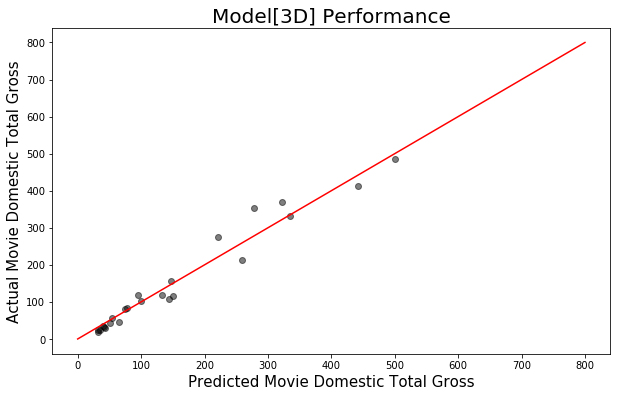

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(en_pred,Y_val,alpha=.5,color='k')
plt.plot(np.linspace(0,800,1000),np.linspace(0,800,1000),color='red')
plt.xlabel('Predicted Movie Domestic Total Gross', fontsize=15)
plt.ylabel('Actual Movie Domestic Total Gross', fontsize=15)
plt.title('Model[3D] Performance', fontsize=20)

plt.savefig('../../Images/model_3d performance.png', dpi=200, bbox_inches = 'tight')

### Plotting Residuals

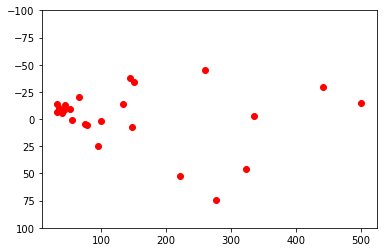

In [51]:
def residual_scatter(model, x, y, color):
    en_pred = model.predict(x)
    residual_ = []
    pred_ = []
    for true,pred in zip(y, en_pred):
        resid = true - pred
        residual_.append(resid)
        pred_.append(pred)
    residual_scatter = plt.scatter(pred_, residual_, color = color)
    plt.ylim(100,-100)
#     return (residual_scatter, residual_hist) 
#         print("pred, resid:", str(pred) + ", $"+ str(resid))
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')
residual_scatter(best_en_I2, X_val, Y_val, 'r',)

NormaltestResult(statistic=4.8730207785269002, pvalue=0.087465540218435181)

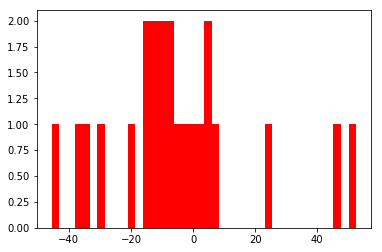

In [48]:
def residual_hist(model, x, y, color, outlier_value=260):
    en_pred = model.predict(x)
    residual_ = []
    for true,pred in zip(y, en_pred):
        resid = true - pred
        residual_.append(resid)
        residual_ = [i for i in residual_ if abs(i) < outlier_value]
    residual_hist = plt.hist(residual_, color = color, bins=40)
    return normaltest(residual_)
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')

residual_hist(best_en_I2, X_val, Y_val, 'r', 70)

In [47]:
Y_val

17    116.601172
15    368.384330
22     30.353973
29    101.704370
6     486.295561
75     55.703475
9     412.038809
32     25.107267
14    119.793567
31     25.326071
90     45.157105
40     83.504017
30    274.092705
97     42.587643
15    119.436770
55    214.030500
24    332.003538
13     35.074677
87    155.190832
19    352.390543
17     33.618855
23    106.580051
44     80.080379
45     18.302607
Name: DomesticTotalGross, dtype: float64

In [52]:
Fifty_Shades_Darker = np.array([ 1.09278962, -0.28060677, -0.29546842, -0.23204774, -0.30983867,
        1.64398987, -0.37638633, -0.26516504, -0.12171612, -0.41344912,
       -0.12171612, -0.1496264 ])

In [53]:
best_en_I2.predict(Fifty_Shades_Darker.reshape(1, -1))

array([ 249.38331721])

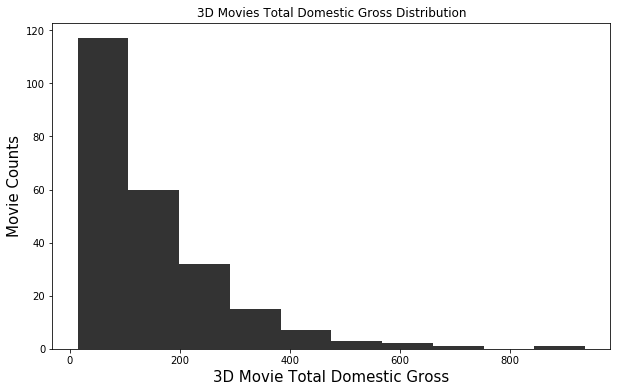

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(movies_df_3D.DomesticTotalGross,bins=10,alpha=0.8,color='k')
plt.xlabel('3D Movie Total Domestic Gross', fontsize=15)
plt.ylabel('Movie Counts', fontsize=15)
plt.title('3D Movies Total Domestic Gross Distribution')

plt.savefig('../../Images/model_3d hist.png', dpi=200, bbox_inches = 'tight')

### Model Results 

In [37]:
# adjusted r2

def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

adj_r2(r2_score(Y_val,en_pred),X_tr.shape[0],X_tr.shape[1])

0.95357462920105207

In [38]:
# Standard Error of the Estimate

def standard_error_estimate(true,pred,num_data):
    sse = 0
    for y,ypred in zip(true,pred):
        sse += (y-ypred)**2
    return np.sqrt(sse/(num_data-2))

standard_error_estimate(Y_val,en_pred,X_tr.shape[0])

9.2824419331277799

In [39]:
def test_model_results(true, X, pred):
    print("Mean Squared Error: ", mean_squared_error(true,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
    print("Mean Absolute Error: ",mean_absolute_error(true,pred))
    r2 = r2_score(true,pred)
    print("R2: ", r2)
    print("Adj R2: ", adj_r2(r2,X.shape[0],X.shape[1]))
    print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
          
test_model_results(Y_val, X_tr, en_pred)

Mean Squared Error:  761.112932803
Root Mean Squared Error:  27.5882752778
Mean Absolute Error:  20.1829422231
R2:  0.960331373308
Adj R2:  0.953574629201
Standard Error of Estimate:  9.28244193313
